In [ ]:
# Importing necessary libraries

import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
# Load the dataset

df = pd.read_excel('/content/EDA.xlsx')

In [ ]:
# Basic information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41629 entries, 0 to 41628
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country ISO-3 Code    41629 non-null  object 
 1   Country Short Name    41629 non-null  object 
 2   Year period           41629 non-null  object 
 3   Median Year           41629 non-null  int64  
 4   Start Month           39560 non-null  object 
 5   End Month             39495 non-null  object 
 6   WHO Reference number  41629 non-null  int64  
 7   Representation level  1618 non-null   object 
 8   Region                11051 non-null  object 
 9   Other group/Zone      31 non-null     object 
 10  Age                   41629 non-null  object 
 11  Sex                   41629 non-null  object 
 12  Mother education      1386 non-null   object 
 13  Wealth quintile       3334 non-null   object 
 14  Urban/Rural           41629 non-null  object 
 15  Sample size        

In [ ]:
# View first 5 rows of the dataset

df.head()

,Country ISO-3 Code,Country Short Name,Year period,Median Year,Start Month,End Month,WHO Reference number,Representation level,Region,Other group/Zone,...,Severe wasting,Wasting,Overweight,Stunting,Underweight,Short Source Code,Reference Title,Author,Notes,JME (Y/N)
0,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,1.20261,3.63299,4.50092,44.60430,18.35824,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Selected for JME
1,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,2.52439,6.25841,14.13189,26.19436,14.19366,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
2,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,1.97696,6.63969,4.74012,24.18722,14.68663,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
3,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,1.33964,4.81251,3.29225,41.13941,17.18858,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME
4,AFG,Afghanistan,2022-2023,2022,SEP,FEB,10055,NaN,NaN,NaN,...,0.94883,2.98044,3.45675,54.68480,21.04723,MICS,Afghanistan Multiple Indicator Cluster Survey ...,UNICEF,NaN,Not selected for JME


In [ ]:
df.shape

(41629, 26)

In [ ]:
df.columns

Index(['Country ISO-3 Code', 'Country Short Name', 'Year period',
       'Median Year', 'Start Month', 'End Month', 'WHO Reference number',
       'Representation level', 'Region', 'Other group/Zone', 'Age', 'Sex',
       'Mother education', 'Wealth quintile', 'Urban/Rural', 'Sample size',
       'Severe wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight',
       'Short Source Code', 'Reference Title', 'Author', 'Notes', 'JME (Y/N)'],
      dtype='object')

In [ ]:
len(df.columns)

26

In [ ]:
df.size

1082354

In [ ]:
# Summary statistics for numerical columns

df.describe()

,Median Year,WHO Reference number,Sample size,Severe wasting,Wasting,Overweight,Stunting,Underweight
count,41629.000000,41629.000000,36588.000000,39564.000000,40161.000000,39440.000000,40237.000000,40579.000000
mean,2007.864566,3422.558097,1720.393080,2.115046,6.948246,5.891519,27.553171,15.583042
std,9.284120,1879.976794,4948.012744,2.385827,5.764848,5.048195,16.533984,12.571275
min,1966.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2001.000000,2768.000000,334.000000,0.545408,2.454410,2.131672,14.033330,5.163105
50%,2009.000000,3201.000000,725.000000,1.398590,5.624420,4.601200,26.017800,13.135100
75%,2015.000000,3453.000000,1559.000000,2.843222,9.909120,8.256985,38.650880,22.500935
max,2023.000000,10693.000000,237205.000000,42.643560,60.535370,72.000000,95.900000,78.700000


In [ ]:
# Checking for missing values

df.isnull().sum()

,0
Country ISO-3 Code,0
Country Short Name,0
Year period,0
Median Year,0
Start Month,2069
End Month,2134
WHO Reference number,0
Representation level,40011
Region,30578
Other group/Zone,41598


In [ ]:
100*(df.isnull().sum())/len(df)

,0
Country ISO-3 Code,0.000000
Country Short Name,0.000000
Year period,0.000000
Median Year,0.000000
Start Month,4.970093
End Month,5.126234
WHO Reference number,0.000000
Representation level,96.113286
Region,73.453602
Other group/Zone,99.925533


In [ ]:
# Checking for duplicates

df.duplicated().sum()

0

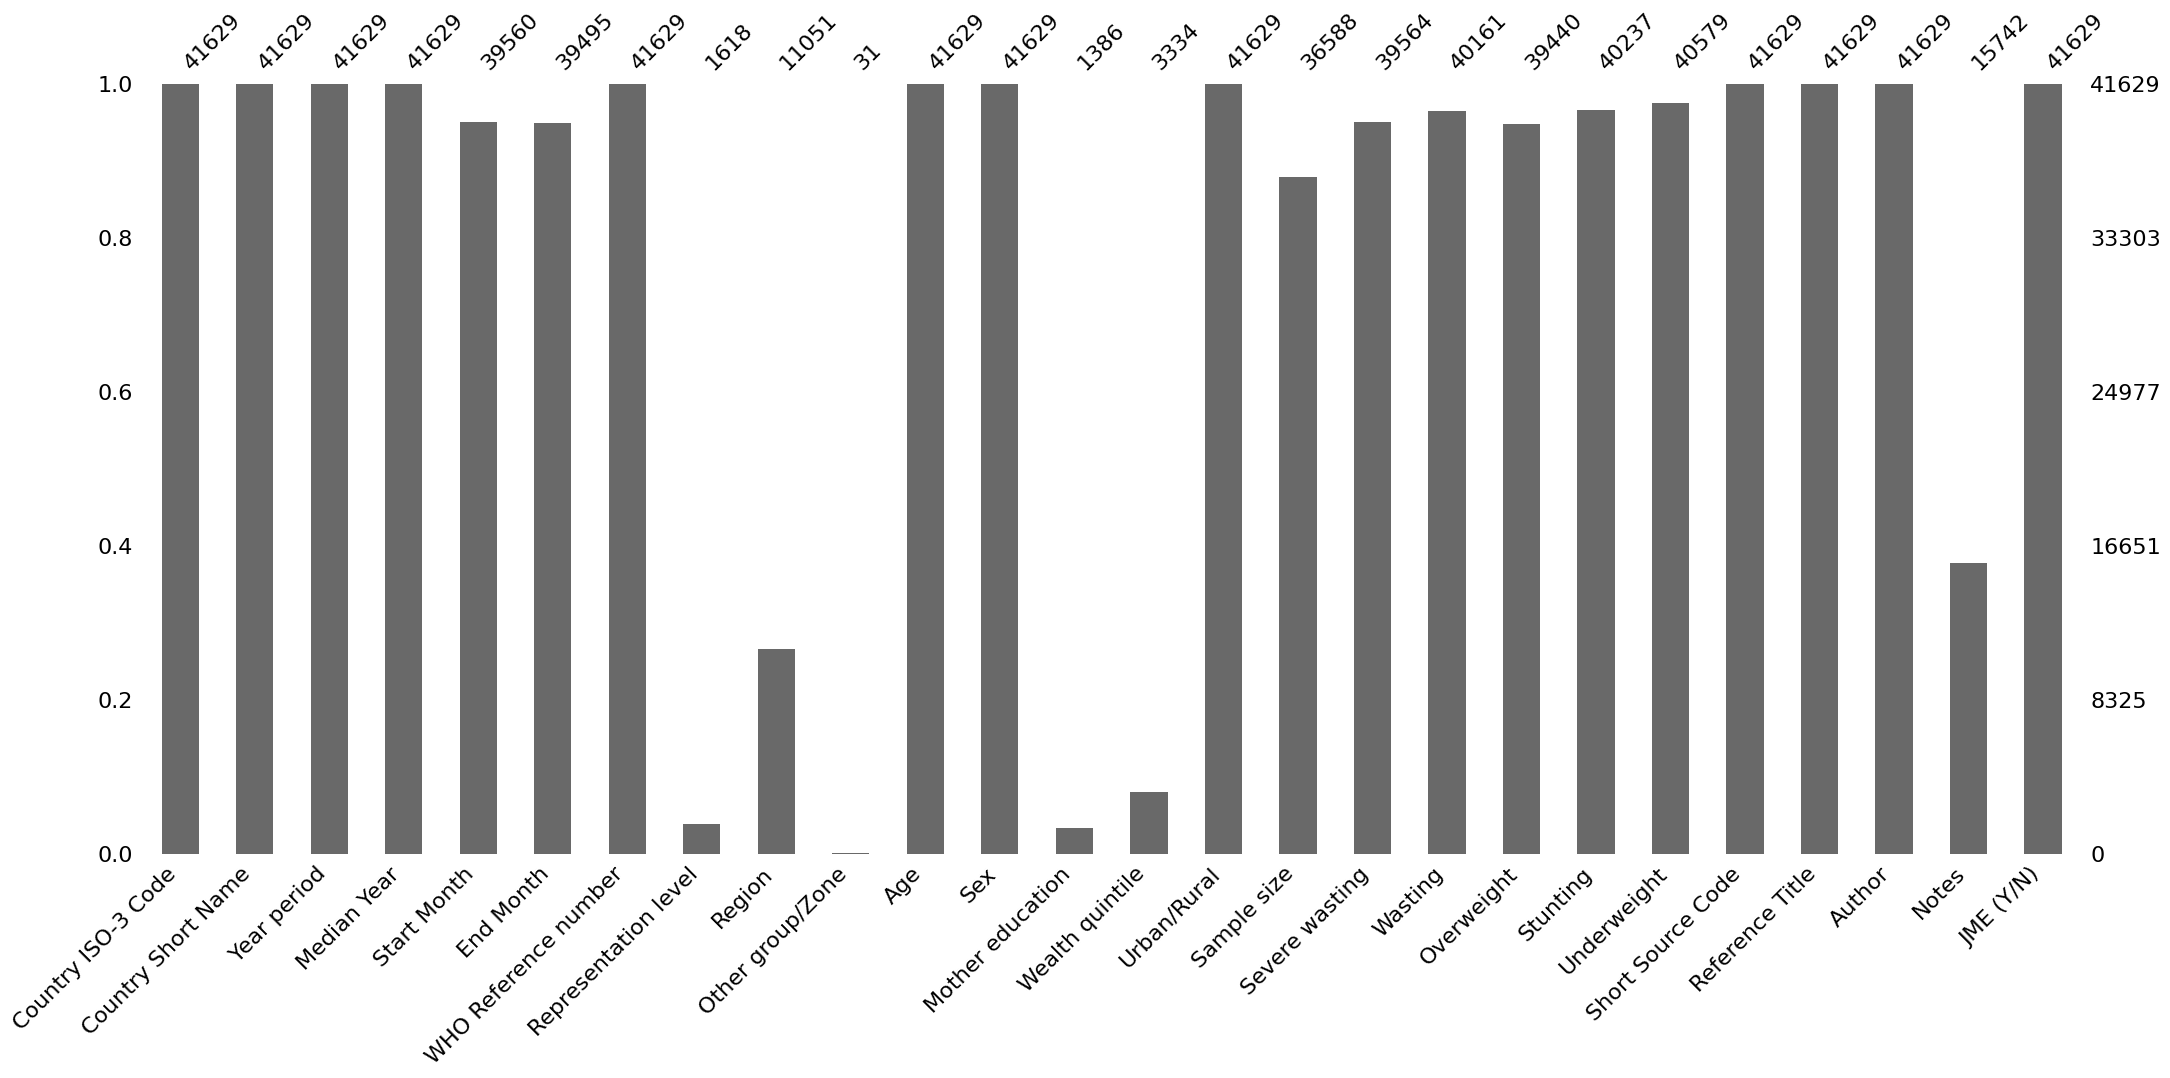

In [ ]:
msno.bar(df)
plt.show()

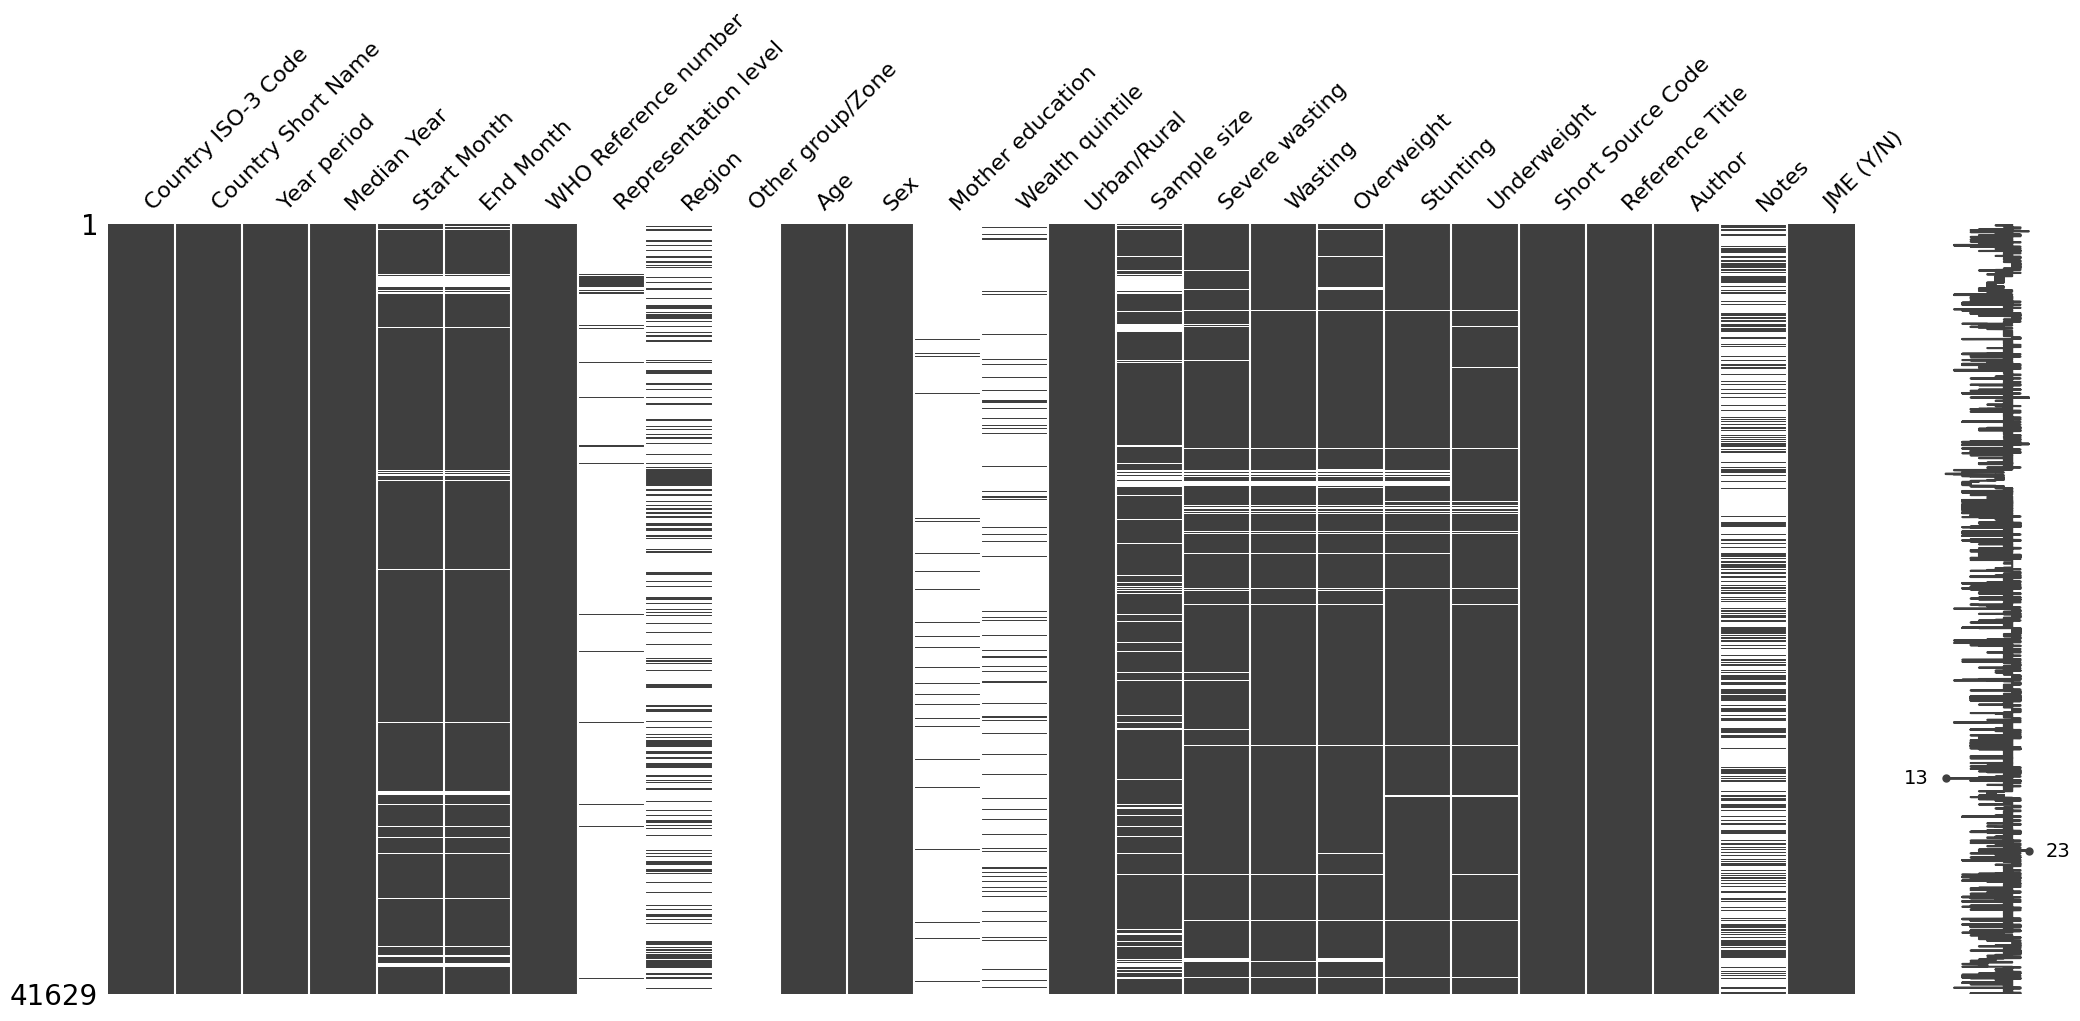

In [ ]:
msno.matrix(df)
plt.show()

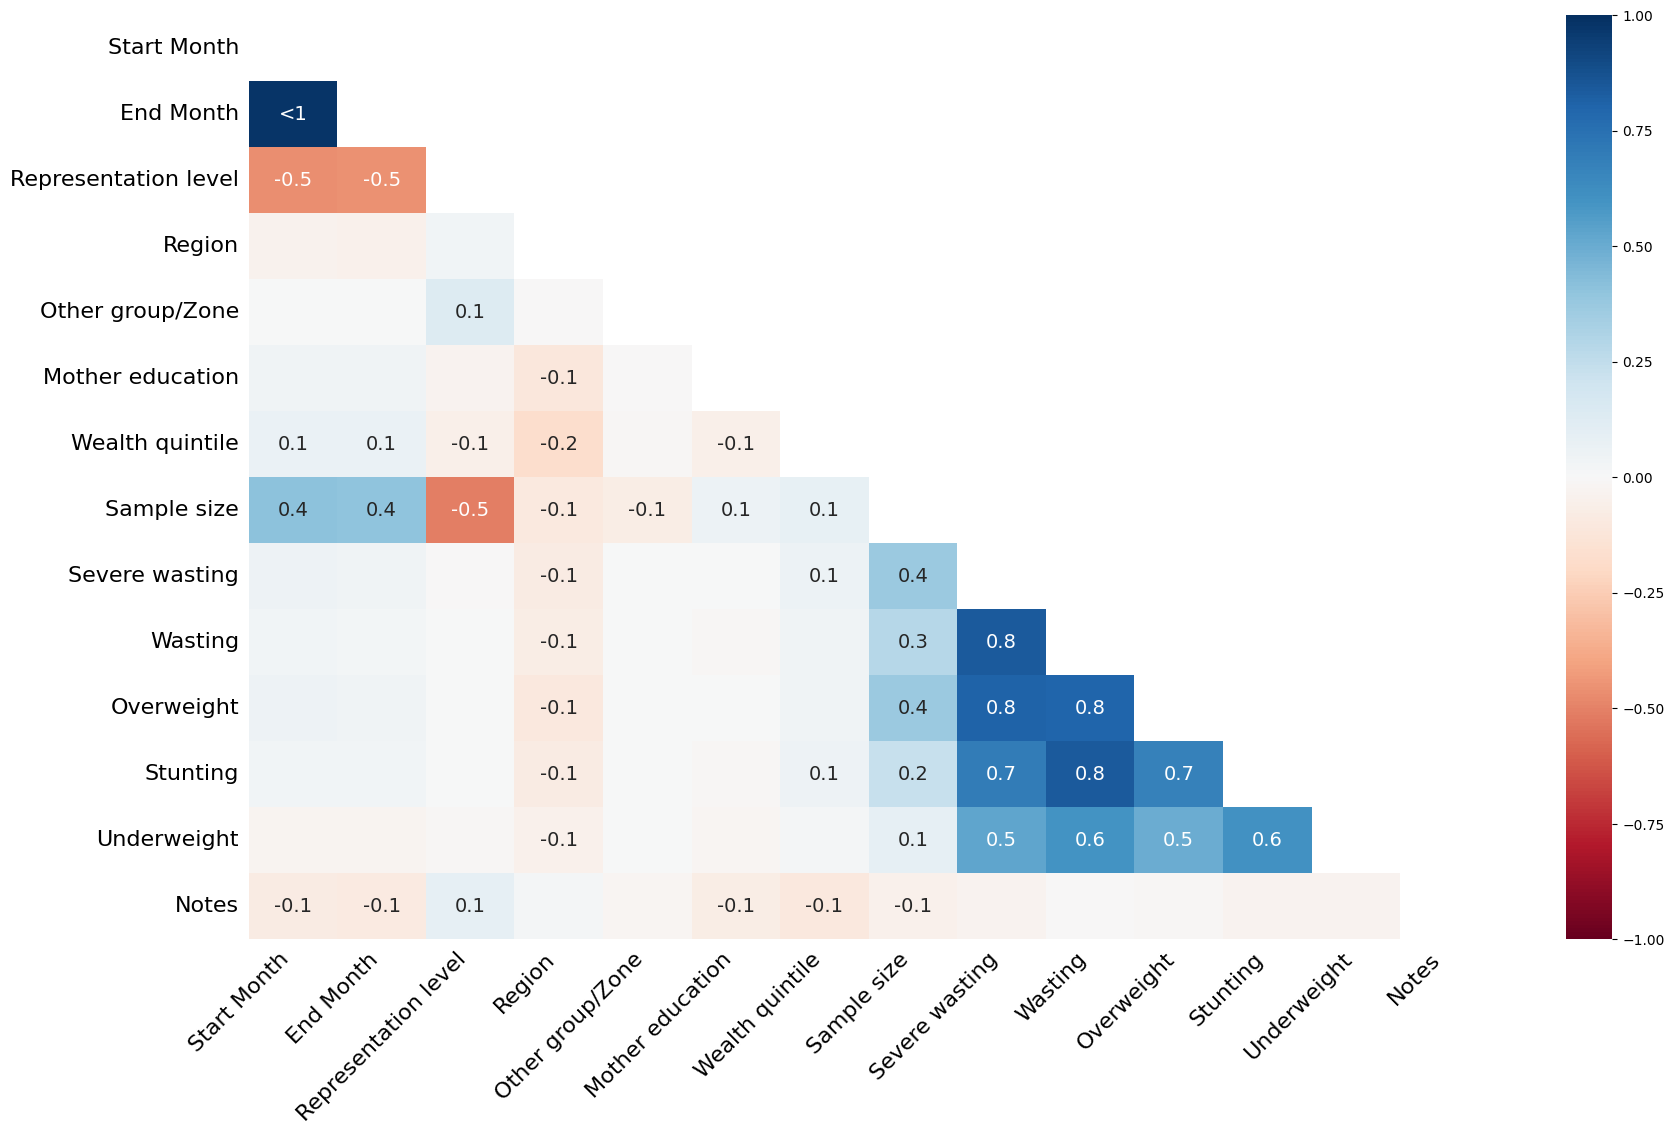

In [ ]:
msno.heatmap(df)
plt.show()

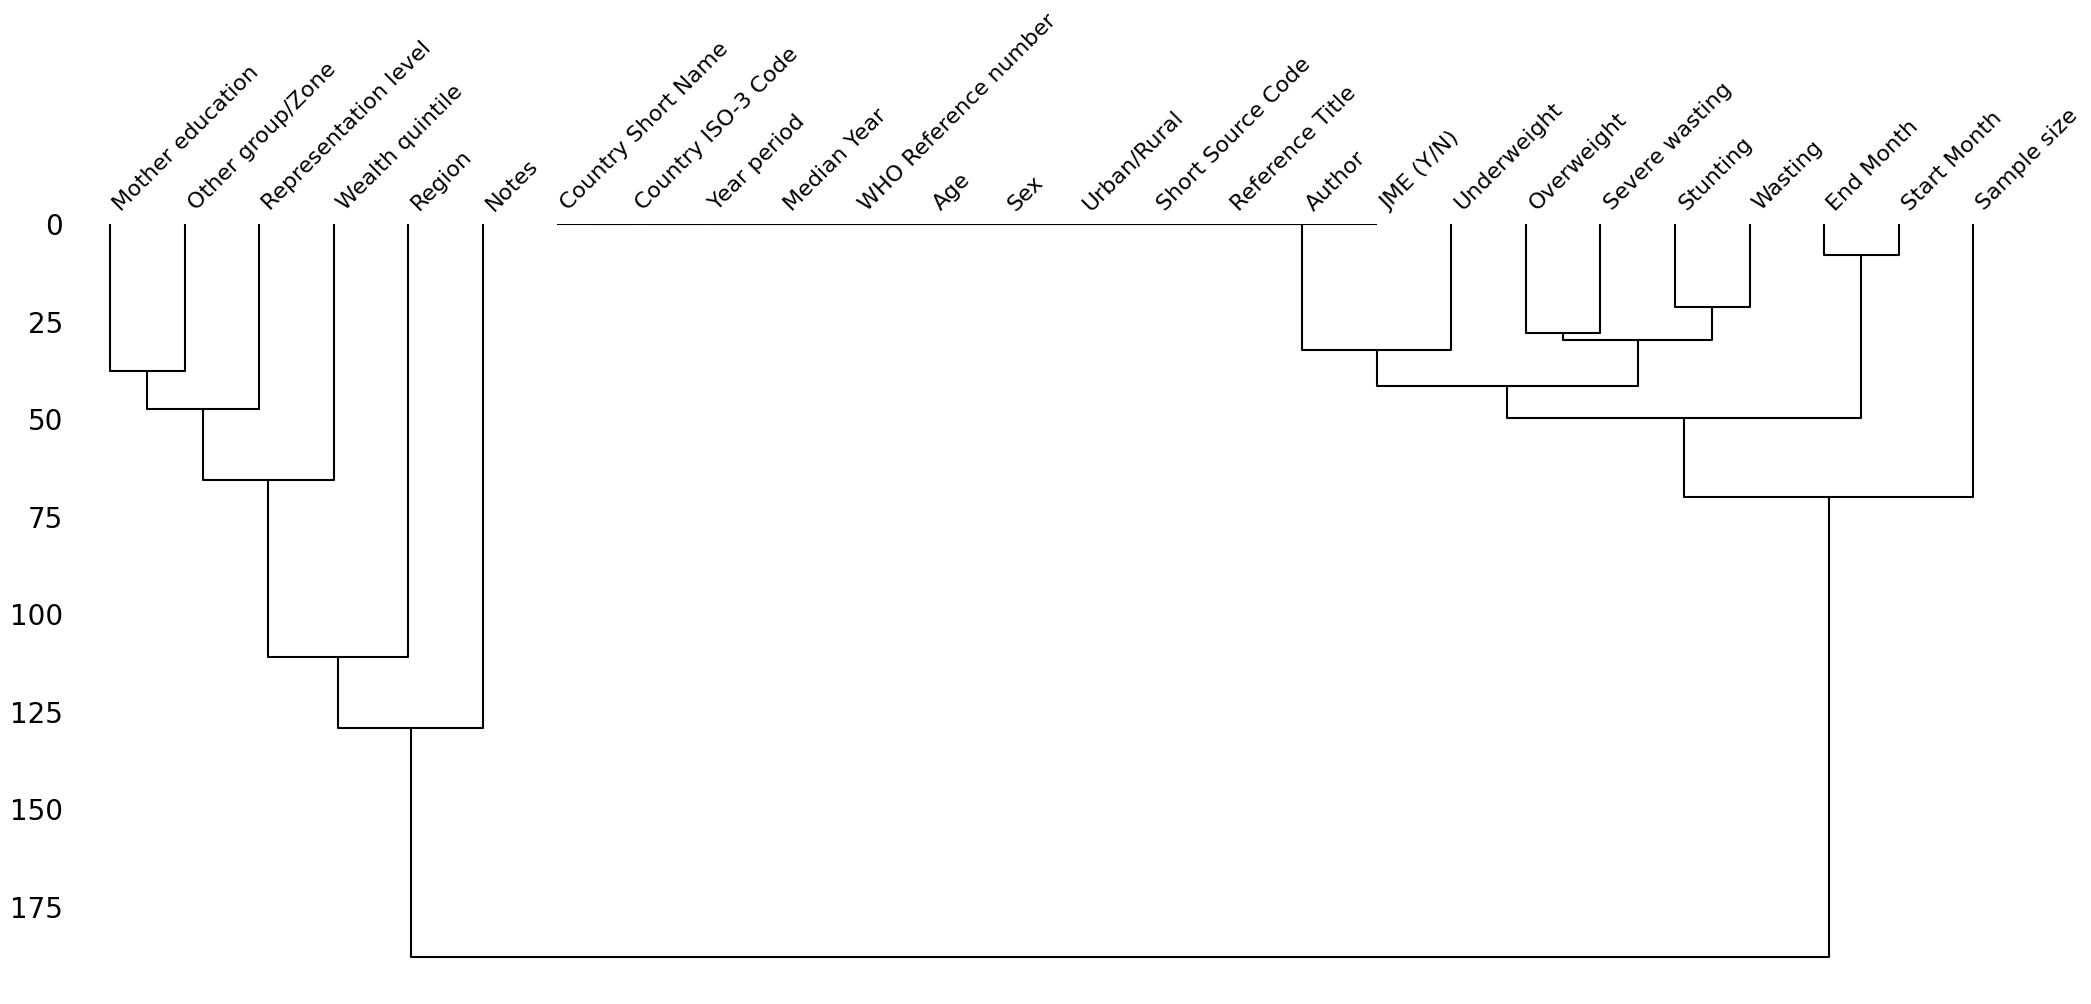

In [ ]:
msno.dendrogram(df)
plt.show()

In [ ]:
# Drop columns with > 90% missing data

df.drop(columns=['Other group/Zone', 'Representation level', 'Mother education'], inplace=True)

In [ ]:
# Impute missing values for numerical columns with relatively low missing data using mean
numerical_columns_with_missing = ['Sample size', 'Severe wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']

# Impute missing values for numerical columns with the mean
for col in numerical_columns_with_missing:
    df[col] = df[col].fillna(df[col].mean())

In [ ]:
# Handle 'Start Month' and 'End Month' as categorical variables

df['Start Month'] = df['Start Month'].fillna(df['Start Month'].mode()[0])
df['End Month'] = df['End Month'].fillna(df['End Month'].mode()[0])

In [ ]:
# Impute categorical columns with the mode

df['Region'] = df['Region'].fillna(df['Region'].mode()[0])
df['Wealth quintile'] = df['Wealth quintile'].fillna(df['Wealth quintile'].mode()[0])

In [ ]:
# Handle 'JME (Y/N)' column
df['JME (Y/N)'] = df['JME (Y/N)'].fillna(df['JME (Y/N)'].mode()[0])

In [ ]:
# Drop the 'Notes' column (62% missing)
df.drop(columns=['Notes'], inplace=True)

In [ ]:
# Recheck for missing values after imputation and dropping

100 * (df.isnull().sum()) / len(df)

,0
Country ISO-3 Code,0.0
Country Short Name,0.0
Year period,0.0
Median Year,0.0
Start Month,0.0
End Month,0.0
WHO Reference number,0.0
Region,0.0
Age,0.0
Sex,0.0


In [ ]:
# Drop irrelevant columns

df.drop(columns=['Country ISO-3 Code', 'Country Short Name', 'Short Source Code', 'Reference Title', 'Author'], inplace=True)


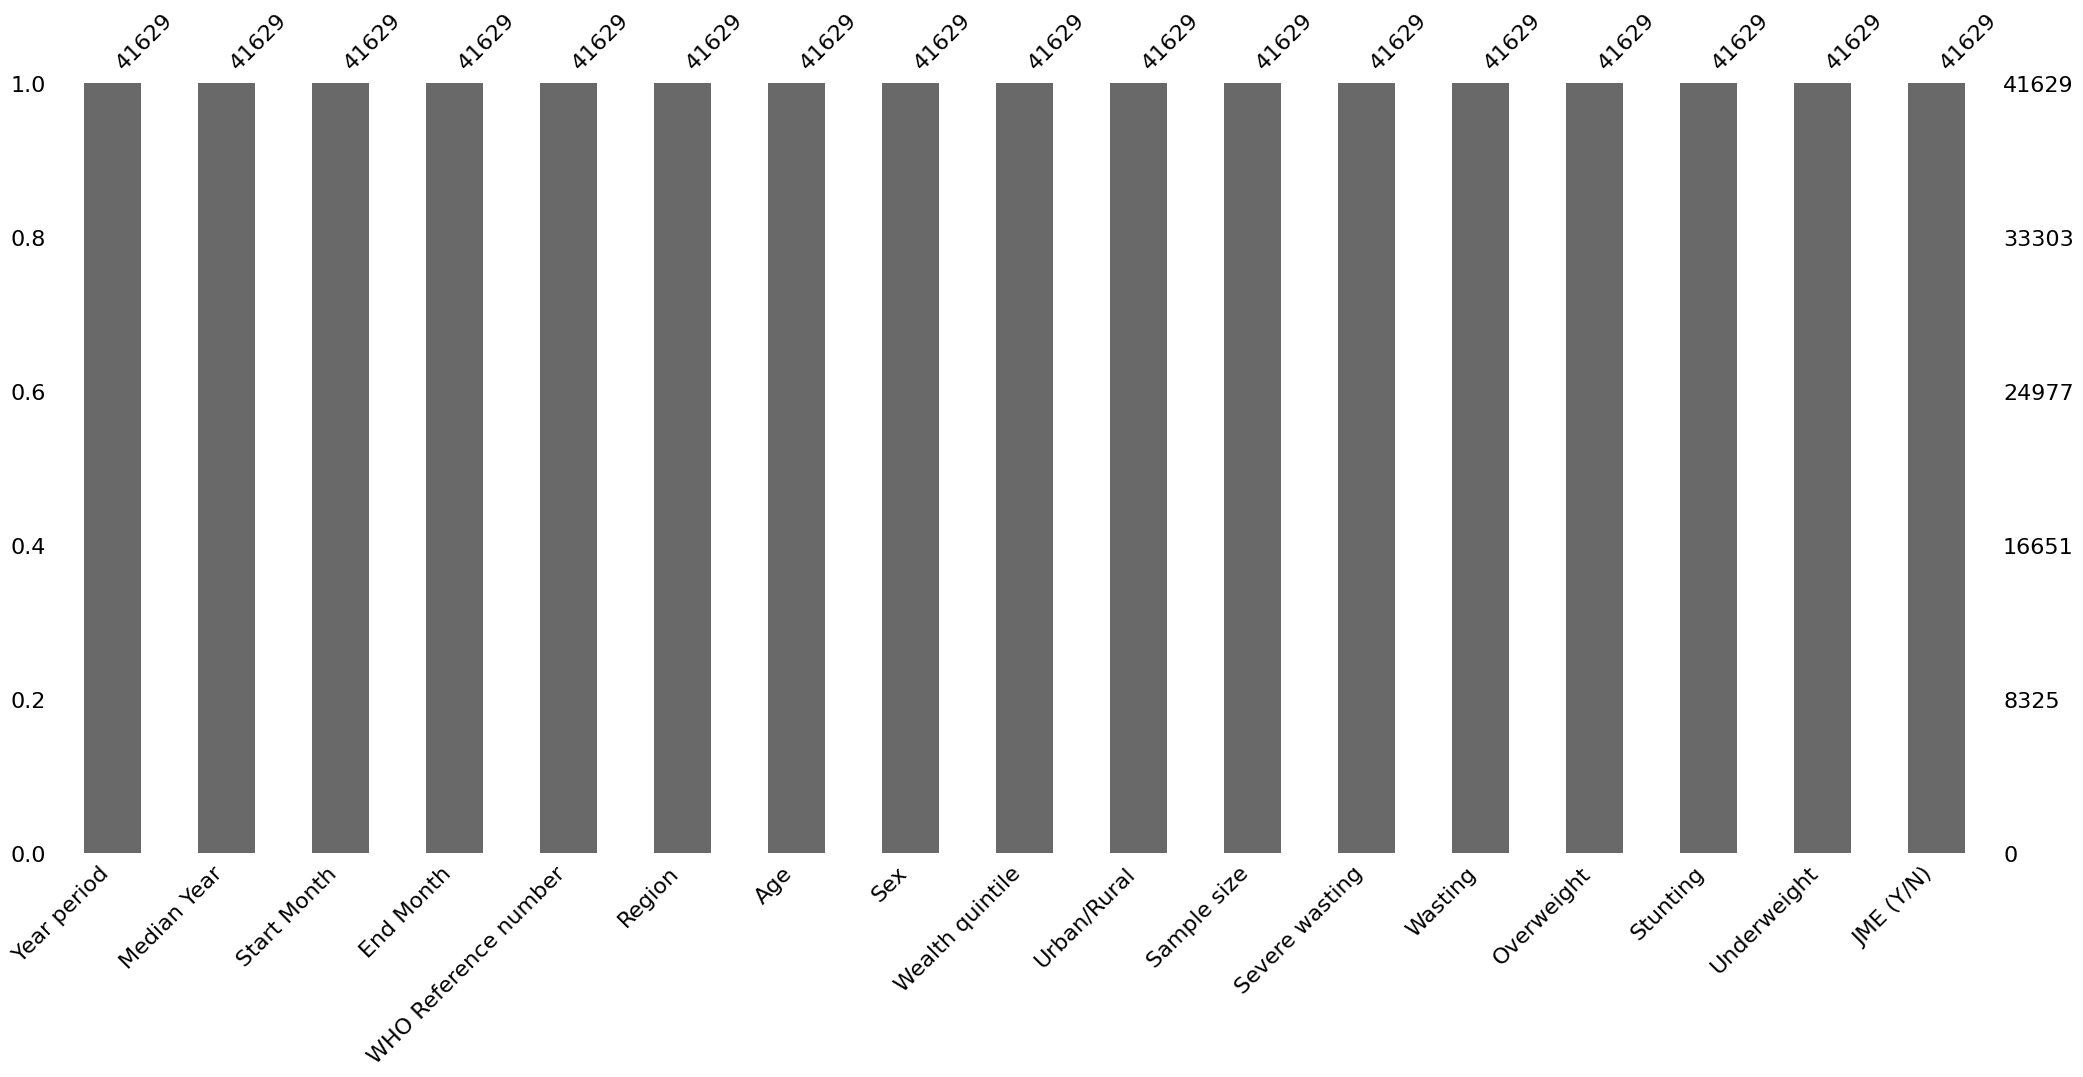

In [ ]:
msno.bar(df)
plt.show()

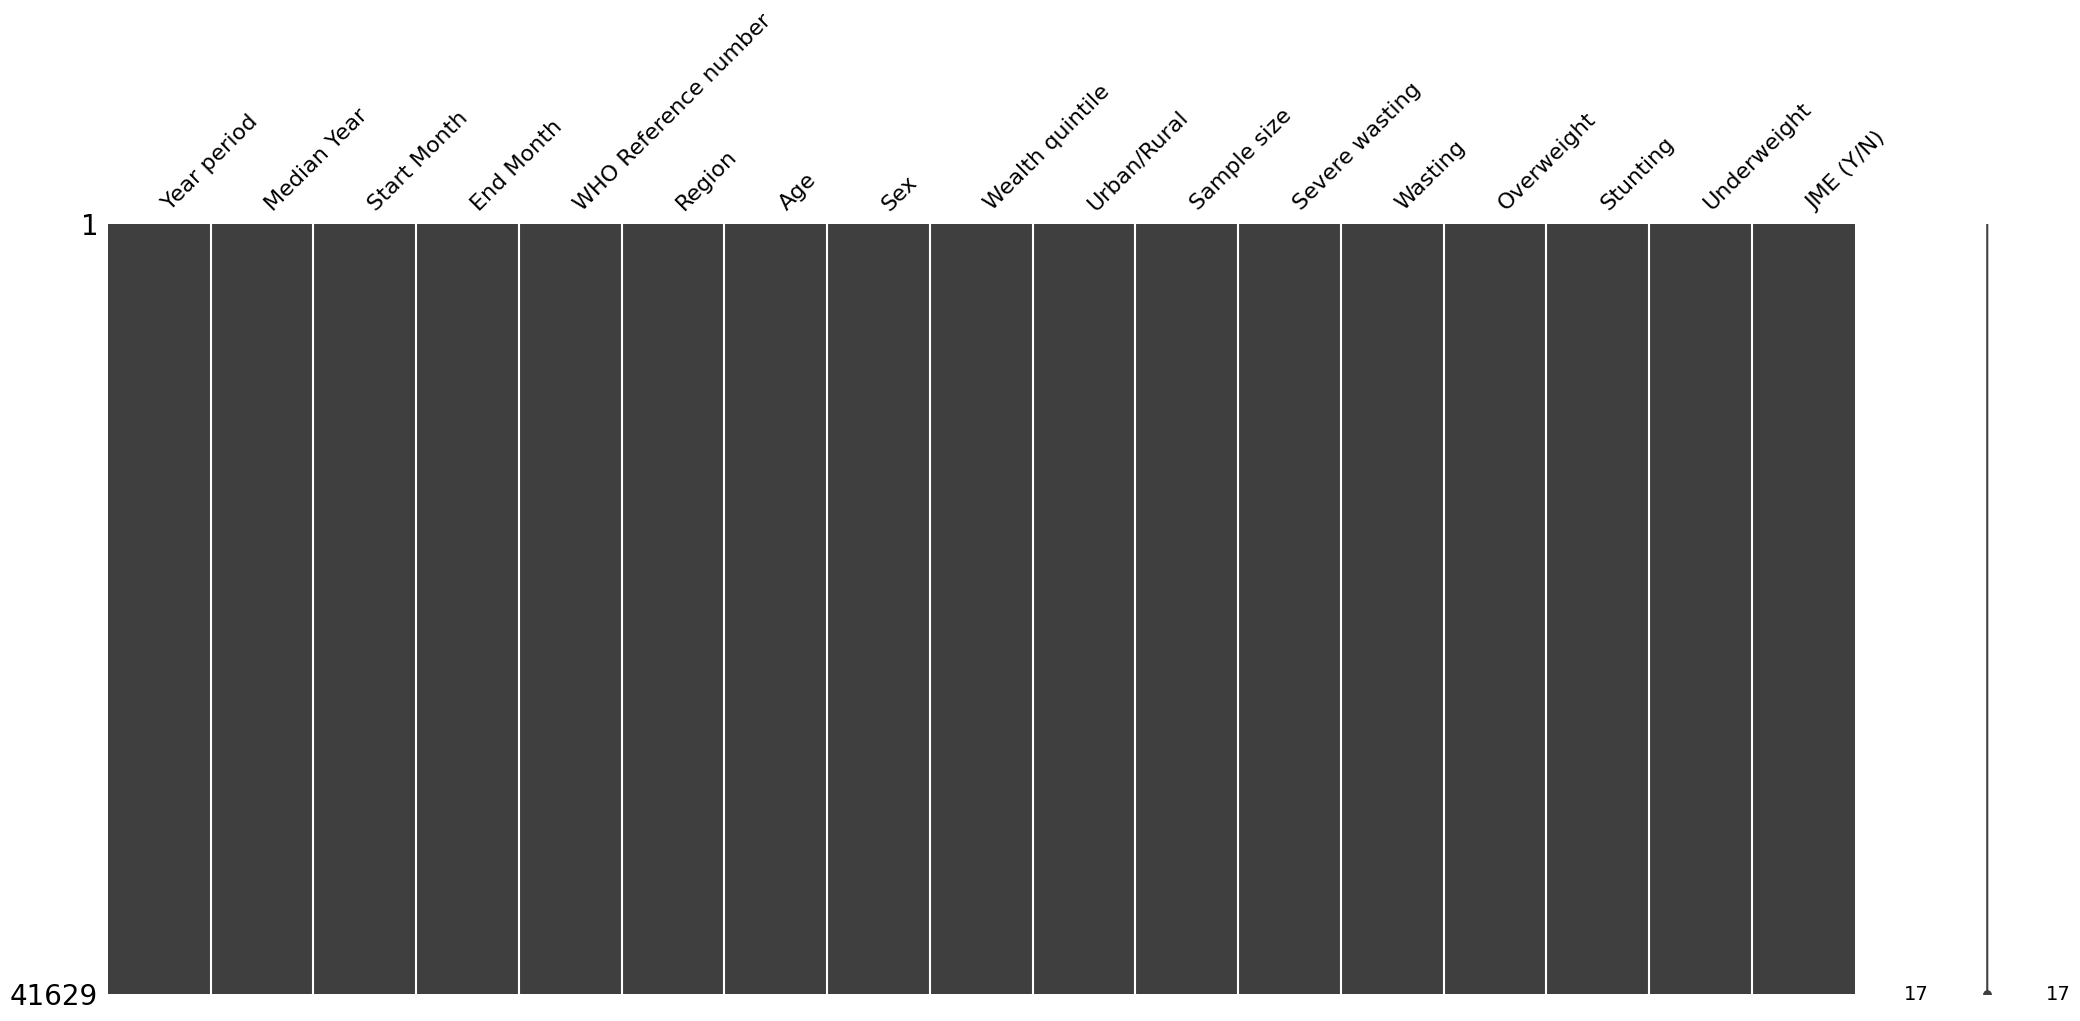

In [ ]:
msno.matrix(df)
plt.show()

In [ ]:
numerical_columns = ['Median Year', 'Sample size', 'Severe wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']

# Apply Standard Scaling
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the transformed data
df.head()

,Year period,Median Year,Start Month,End Month,WHO Reference number,Region,Age,Sex,Wealth quintile,Urban/Rural,Sample size,Severe wasting,Wasting,Overweight,Stunting,Underweight,JME (Y/N)
0,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0. - 4.99,BTSX,WQ1,BOTH,6.592927,-0.392299,-0.585505,-0.283009,1.048978,0.223598,Selected for JME
1,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0. - 0.49,BTSX,WQ1,BOTH,0.314228,0.175996,-0.121831,1.677049,-0.083593,-0.111942,Not selected for JME
2,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0.50 - 0.99,BTSX,WQ1,BOTH,0.302371,-0.059370,-0.054494,-0.234328,-0.207072,-0.072224,Not selected for JME
3,2022-2023,1.522557,SEP,FEB,10055,Dhaka,1. - 1.99,BTSX,WQ1,BOTH,0.938109,-0.333383,-0.377191,-0.528993,0.835819,0.129358,Not selected for JME
4,2022-2023,1.522557,SEP,FEB,10055,Dhaka,2. - 2.99,BTSX,WQ1,BOTH,0.972171,-0.501410,-0.700751,-0.495515,1.669125,0.440250,Not selected for JME


In [ ]:
# Create a new feature 'Malnutrition Severity' by combining multiple malnutrition indicators
df['Malnutrition Severity'] = df['Severe wasting'] + df['Wasting'] + df['Underweight'] - df['Overweight'] - df['Stunting']


In [ ]:
df.head()

,Year period,Median Year,Start Month,End Month,WHO Reference number,Region,Age,Sex,Wealth quintile,Urban/Rural,Sample size,Severe wasting,Wasting,Overweight,Stunting,Underweight,JME (Y/N),Malnutrition Severity
0,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0. - 4.99,BTSX,WQ1,BOTH,6.592927,-0.392299,-0.585505,-0.283009,1.048978,0.223598,Selected for JME,-1.520174
1,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0. - 0.49,BTSX,WQ1,BOTH,0.314228,0.175996,-0.121831,1.677049,-0.083593,-0.111942,Not selected for JME,-1.651233
2,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0.50 - 0.99,BTSX,WQ1,BOTH,0.302371,-0.059370,-0.054494,-0.234328,-0.207072,-0.072224,Not selected for JME,0.255313
3,2022-2023,1.522557,SEP,FEB,10055,Dhaka,1. - 1.99,BTSX,WQ1,BOTH,0.938109,-0.333383,-0.377191,-0.528993,0.835819,0.129358,Not selected for JME,-0.888041
4,2022-2023,1.522557,SEP,FEB,10055,Dhaka,2. - 2.99,BTSX,WQ1,BOTH,0.972171,-0.501410,-0.700751,-0.495515,1.669125,0.440250,Not selected for JME,-1.935522


In [ ]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # Check how many outliers exist


Median Year        200
Sample size       3390
Severe wasting    2685
Wasting           1210
Overweight        1663
Stunting           244
Underweight        884
dtype: int64


In [ ]:
# Define a function to handle outliers using IQR
def handle_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        df[col] = df[col].apply(lambda x: min(max(x, lower_bound), upper_bound))

    return df

# List of numerical columns to check for outliers
numerical_columns_with_outliers = ['Median Year', 'Sample size', 'Severe wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']

# Step 3: Handle outliers in the dataframe
df = handle_outliers(df, numerical_columns_with_outliers)

In [ ]:
Q1 = df[numerical_columns].quantile(0.25)
Q3 = df[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Define outlier criteria
outliers = ((df[numerical_columns] < (Q1 - 1.5 * IQR)) | (df[numerical_columns] > (Q3 + 1.5 * IQR)))
print(outliers.sum())

Median Year       0
Sample size       0
Severe wasting    0
Wasting           0
Overweight        0
Stunting          0
Underweight       0
dtype: int64


In [ ]:
df.head()

,Year period,Median Year,Start Month,End Month,WHO Reference number,Region,Age,Sex,Wealth quintile,Urban/Rural,Sample size,Severe wasting,Wasting,Overweight,Stunting,Underweight,JME (Y/N),Malnutrition Severity
0,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0. - 4.99,BTSX,WQ1,BOTH,0.434732,-0.392299,-0.585505,-0.283009,1.048978,0.223598,Selected for JME,-1.520174
1,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0. - 0.49,BTSX,WQ1,BOTH,0.314228,0.175996,-0.121831,1.677049,-0.083593,-0.111942,Not selected for JME,-1.651233
2,2022-2023,1.522557,SEP,FEB,10055,Dhaka,0.50 - 0.99,BTSX,WQ1,BOTH,0.302371,-0.059370,-0.054494,-0.234328,-0.207072,-0.072224,Not selected for JME,0.255313
3,2022-2023,1.522557,SEP,FEB,10055,Dhaka,1. - 1.99,BTSX,WQ1,BOTH,0.434732,-0.333383,-0.377191,-0.528993,0.835819,0.129358,Not selected for JME,-0.888041
4,2022-2023,1.522557,SEP,FEB,10055,Dhaka,2. - 2.99,BTSX,WQ1,BOTH,0.434732,-0.501410,-0.700751,-0.495515,1.669125,0.440250,Not selected for JME,-1.935522


In [ ]:
# Set plot style

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

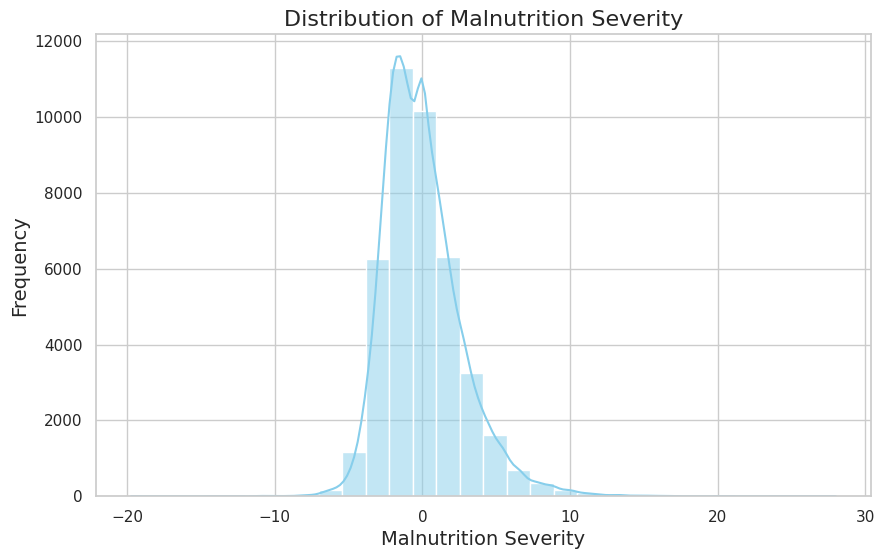

In [ ]:
# Distribution of Malnutrition Severity
plt.figure(figsize=(10, 6))
sns.histplot(df['Malnutrition Severity'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of Malnutrition Severity', fontsize=16)
plt.xlabel('Malnutrition Severity', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

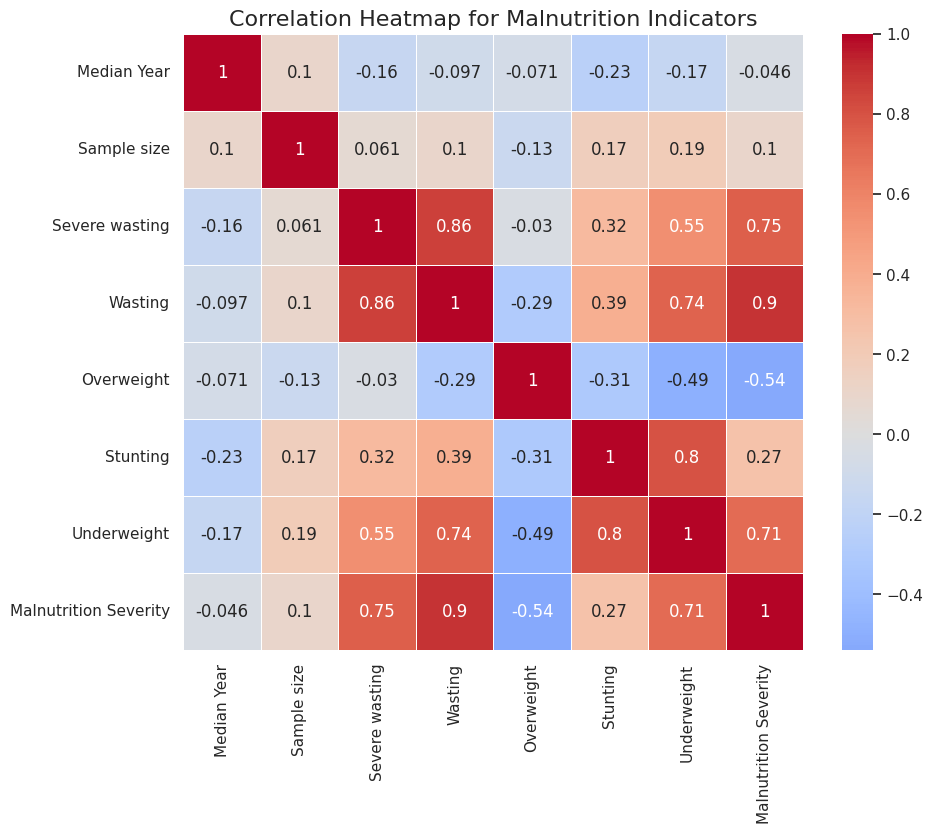

In [ ]:
# 2. Correlation Heatmap for Malnutrition Columns

numerical_columns = ['Median Year', 'Sample size', 'Severe wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight', 'Malnutrition Severity']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5)
plt.title('Correlation Heatmap for Malnutrition Indicators', fontsize=16)
plt.show()

<ipython-input-38-ce9926c5d81a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Age', y='Malnutrition Severity', data=malnutrition_severity_by_age, palette='Blues')


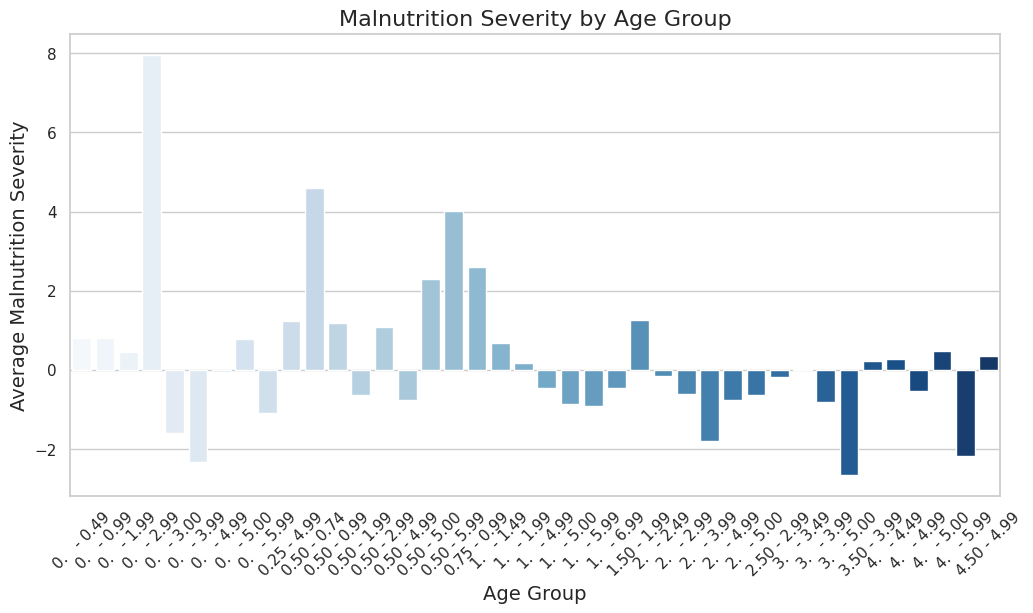

In [ ]:
# 4. Stacked Bar Plot for Malnutrition Severity by Age Group

age_groups = df['Age'].unique()
malnutrition_severity_by_age = df.groupby('Age')['Malnutrition Severity'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Age', y='Malnutrition Severity', data=malnutrition_severity_by_age, palette='Blues')
plt.title('Malnutrition Severity by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Average Malnutrition Severity', fontsize=14)
plt.xticks(rotation=45)
plt.show()

<ipython-input-39-8ca637c75e62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sex', y='Malnutrition Severity', data=gender_comparison, palette='pastel')


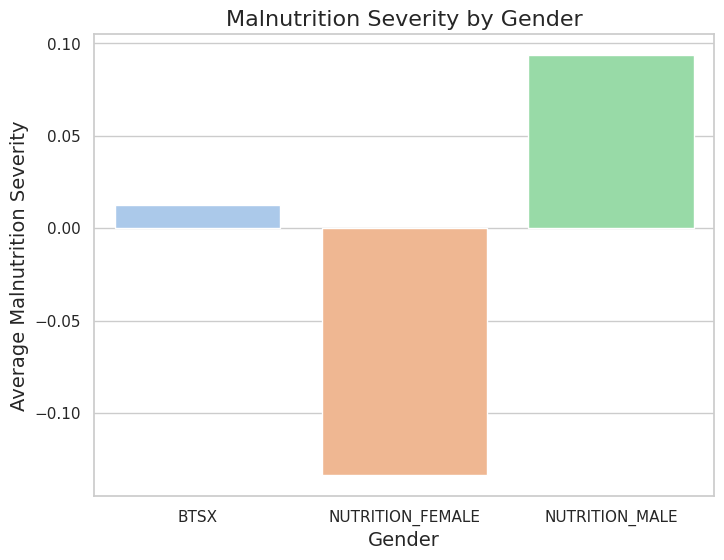

In [ ]:
# 5. Gender Comparison (Male vs Female)
gender_comparison = df.groupby('Sex')['Malnutrition Severity'].mean().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Malnutrition Severity', data=gender_comparison, palette='pastel')
plt.title('Malnutrition Severity by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Malnutrition Severity', fontsize=14)
plt.show()

<ipython-input-40-bc84f6b16d28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Wealth quintile', y='Malnutrition Severity', data=wealth_comparison, palette='viridis')


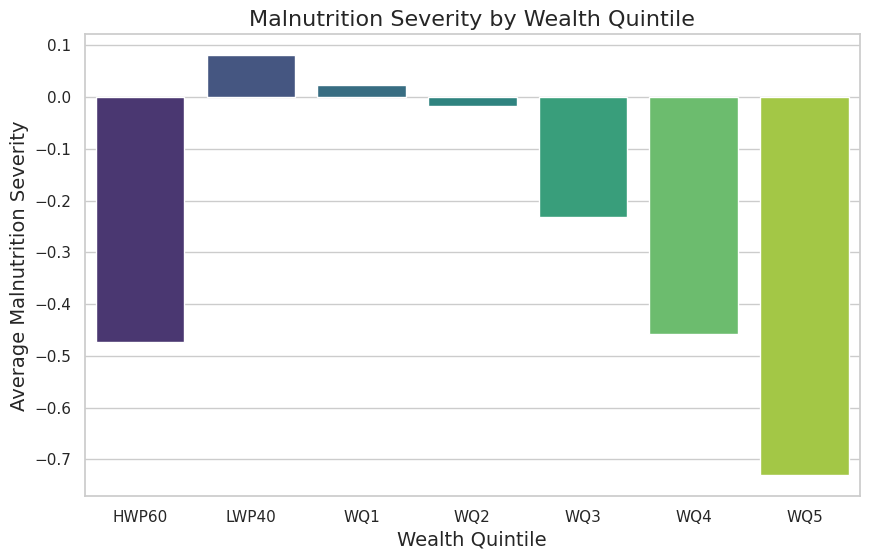

In [ ]:
# 6. Wealth Quintile vs Malnutrition Severity
wealth_comparison = df.groupby('Wealth quintile')['Malnutrition Severity'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Wealth quintile', y='Malnutrition Severity', data=wealth_comparison, palette='viridis')
plt.title('Malnutrition Severity by Wealth Quintile', fontsize=16)
plt.xlabel('Wealth Quintile', fontsize=14)
plt.ylabel('Average Malnutrition Severity', fontsize=14)
plt.show()

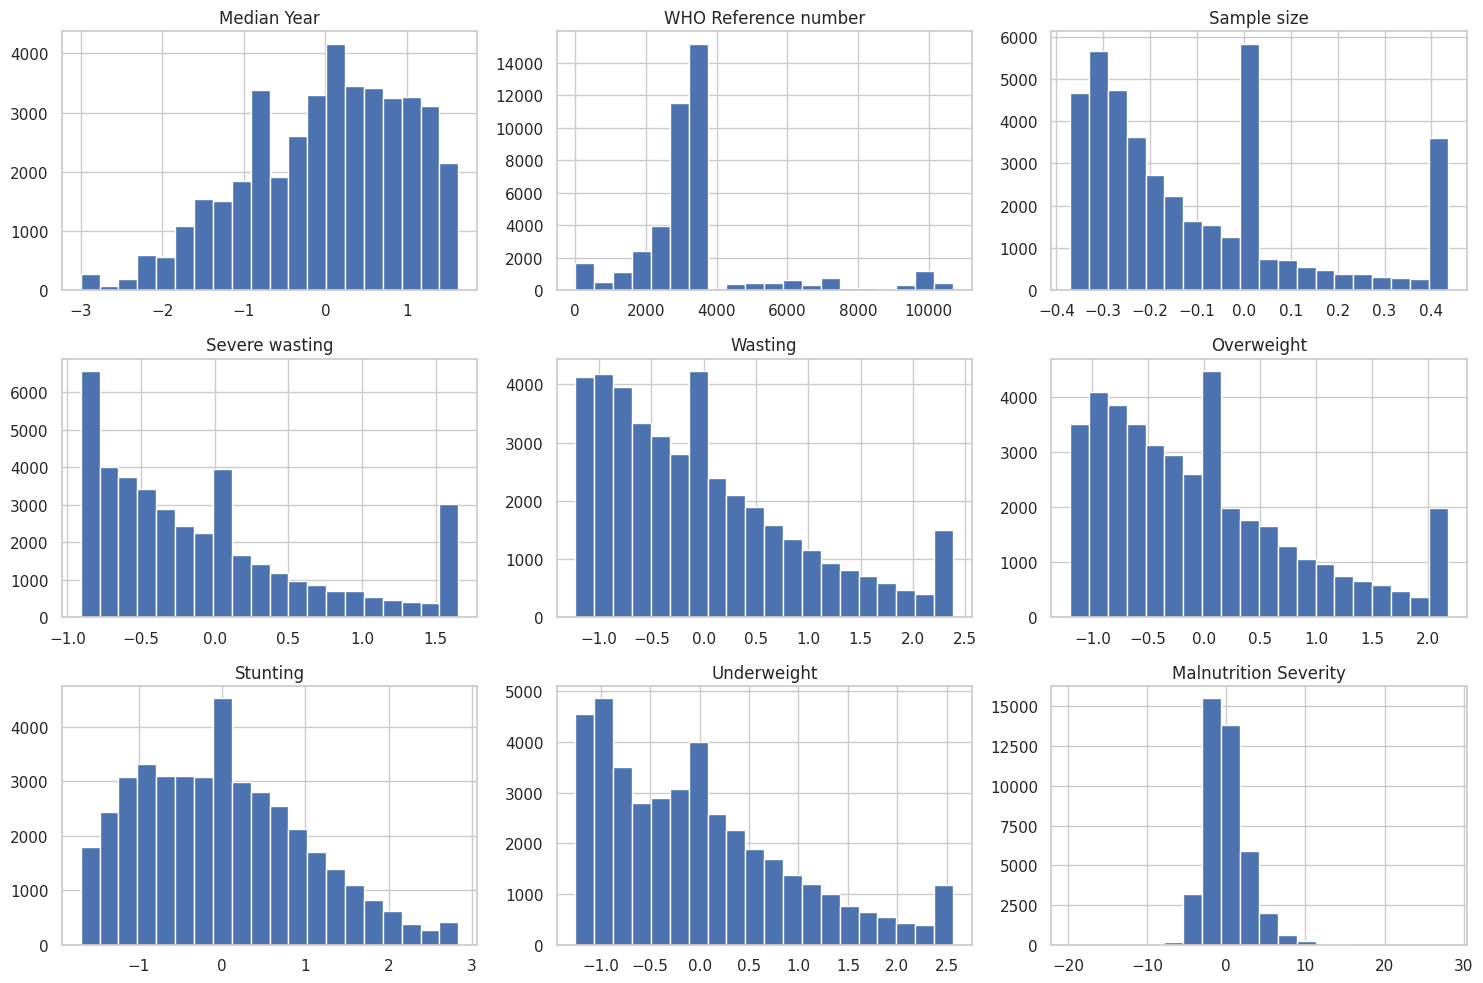

In [ ]:
# Plotting histograms of numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


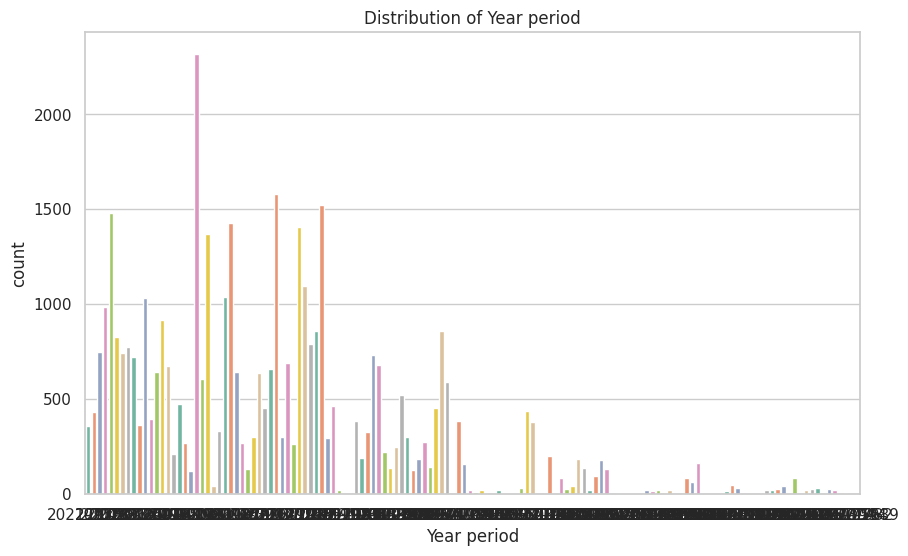

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


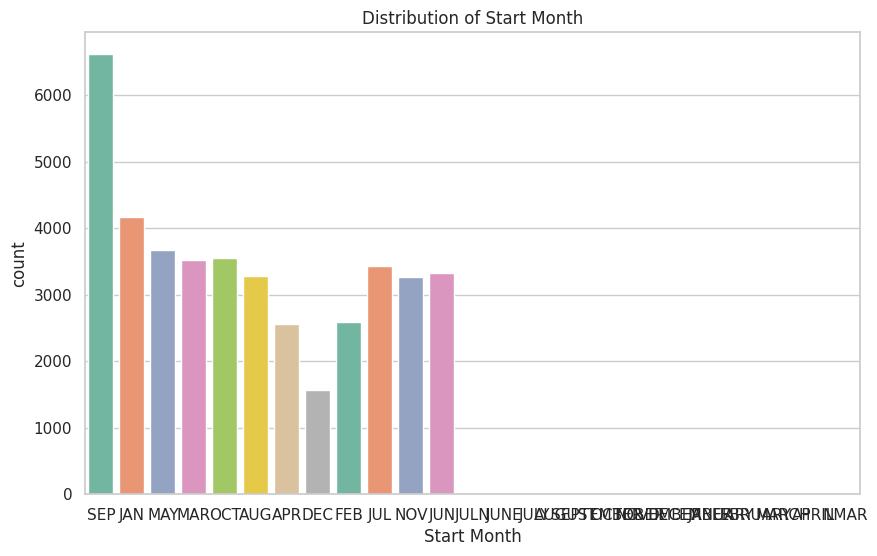

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


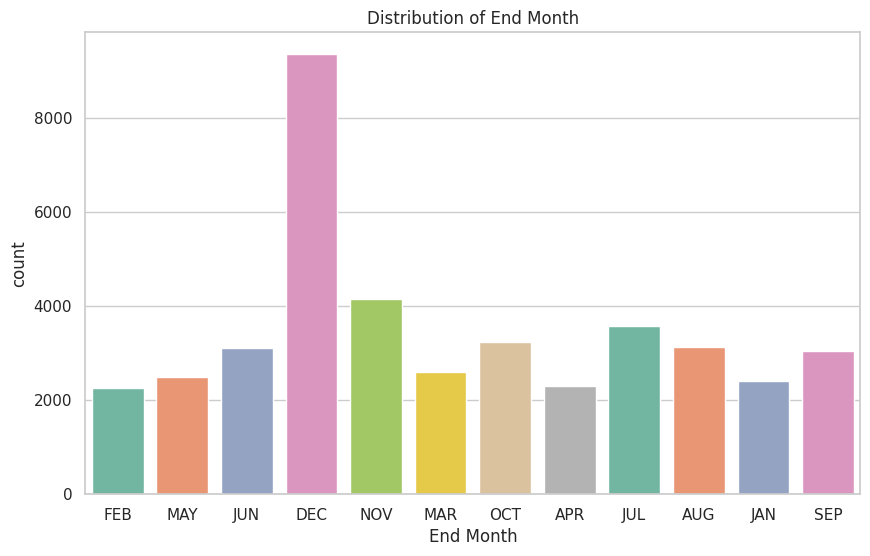

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


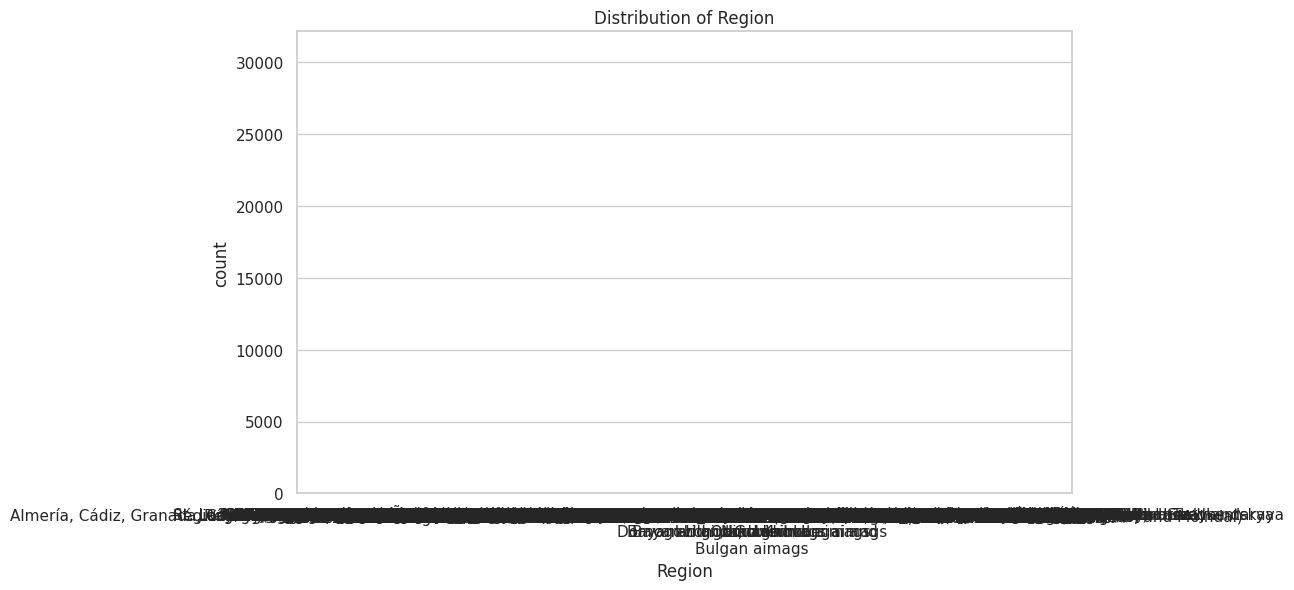

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


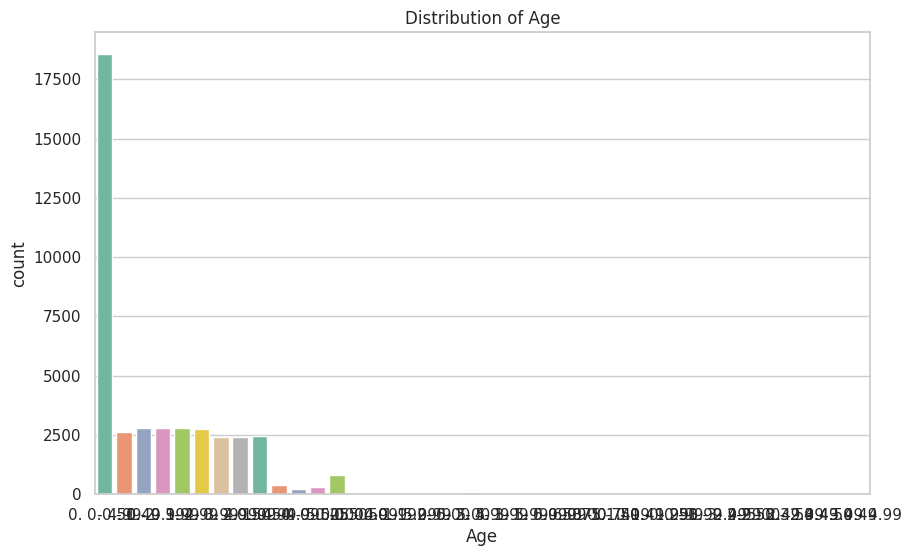

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


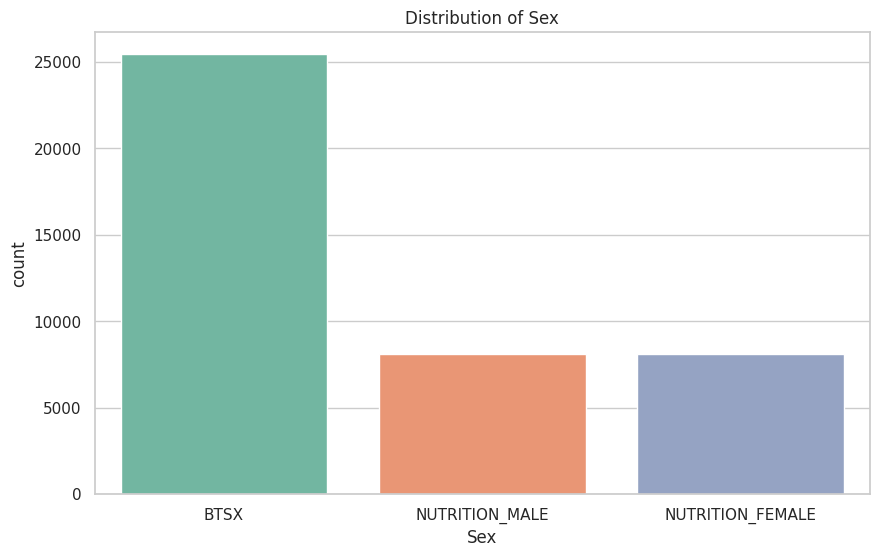

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


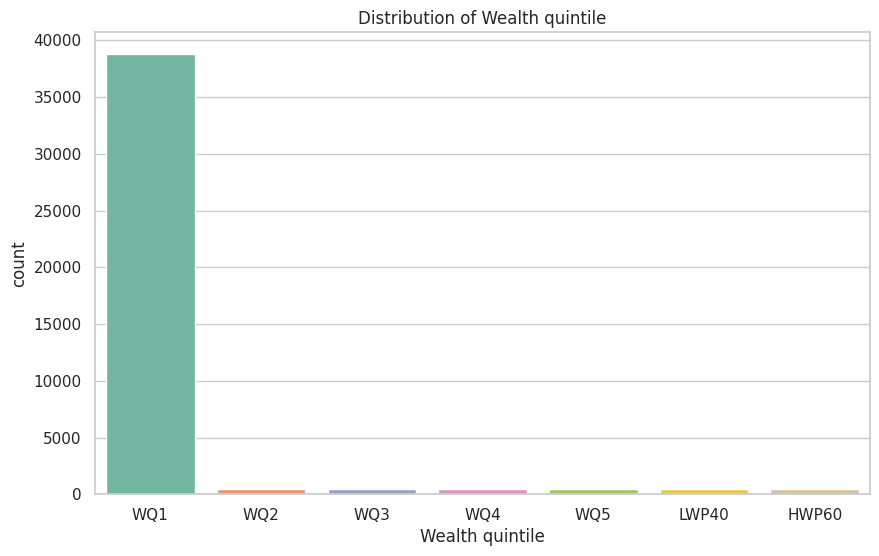

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


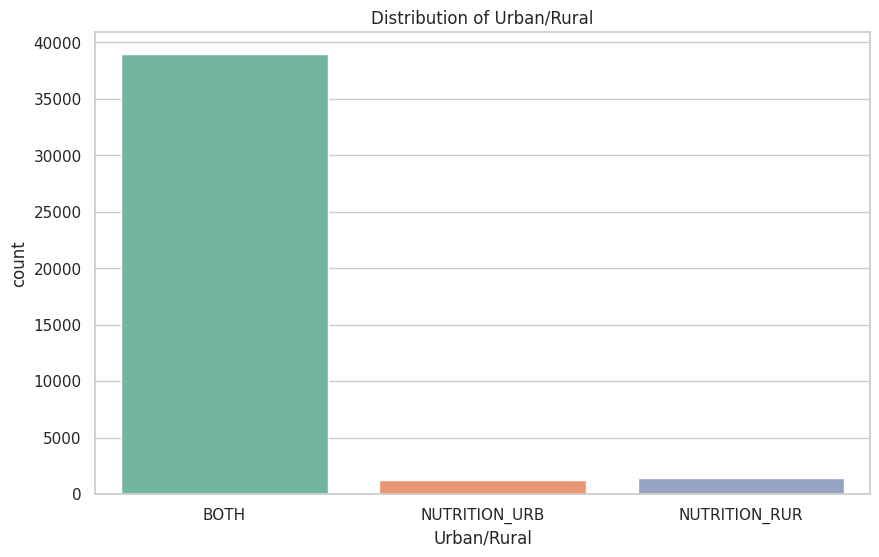

<ipython-input-42-c7bebc253af8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


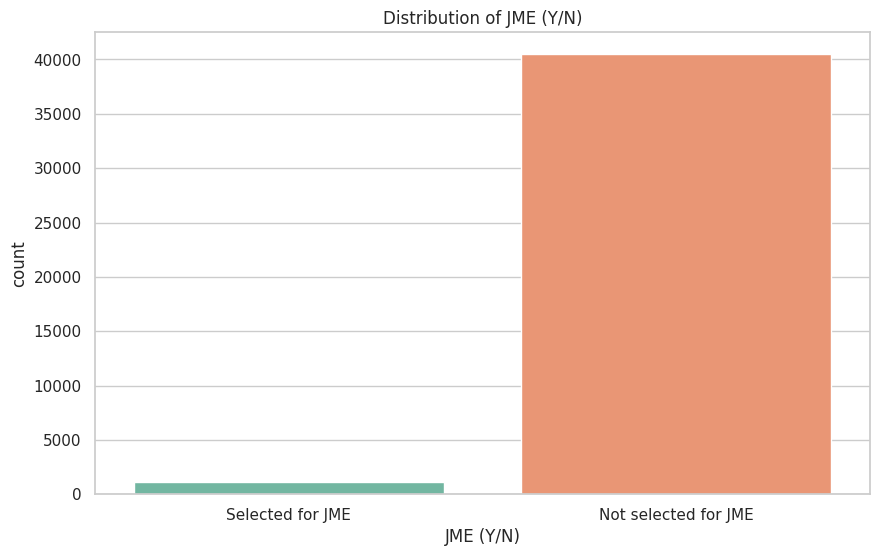

In [ ]:
# Visualizing count distributions for categorical columns
categorical_cols = df.select_dtypes(include=[object]).columns
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f'Distribution of {col}')
    plt.show()

In [ ]:
# Encode categorical variables using LabelEncoder
le = LabelEncoder()

# Encoding categorical columns for model fitting
categorical_columns = ['Region', 'Age', 'Sex', 'Wealth quintile', 'Urban/Rural', 'JME (Y/N)', 'Start Month', 'End Month']

for col in categorical_columns:
    df[col] = le.fit_transform(df[col])



In [ ]:
# Splitting the data into features (X) and target (y)
X = df.drop(columns=['Malnutrition Severity'])
y = df['Malnutrition Severity']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create a separate dataframe for features (X) and target (y)
X = df.drop(columns=['Malnutrition Severity'])  # Features
y = df['Malnutrition Severity']  # Target variable

# List of numerical columns
numerical_columns = ['Median Year', 'Sample size', 'Severe wasting', 'Wasting', 'Overweight', 'Stunting', 'Underweight']

# List of categorical columns
categorical_columns = ['Year period', 'Start Month', 'End Month', 'Region', 'Age', 'Sex', 'Wealth quintile', 'Urban/Rural', 'JME (Y/N)']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using ColumnTransformer to handle both categorical and numerical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_columns),  # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)  # One-Hot Encode categorical features
    ])

# Apply Standard Scaling to numerical columns only
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled = scaler.transform(X_test[numerical_columns])

# Now we need to concatenate the scaled features with the categorical ones
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numerical_columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numerical_columns)

# Concatenate categorical features (unchanged)
X_train_scaled = pd.concat([X_train_scaled, X_train[categorical_columns].reset_index(drop=True)], axis=1)
X_test_scaled = pd.concat([X_test_scaled, X_test[categorical_columns].reset_index(drop=True)], axis=1)

In [ ]:
# Create a function to print metrics for each model
def print_model_metrics(model_name, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\n{model_name}:")
    print(f"R² (Accuracy): {r2:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"MSE: {mse:.4f}")

In [ ]:
# ------- 1. Linear Regression Model -------
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the print_model_metrics function
def print_model_metrics(model_name, y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\n{model_name}:")
    print(f"R-squared: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.4f}")
    print(f"Mean Squared Error: {mse:.4f}")

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Print metrics for the Linear Regression model
print_model_metrics("Linear Regression", y_test, y_pred_lr)



Linear Regression:
R-squared: 0.9418
Mean Absolute Error: 0.2695
Mean Squared Error: 0.4222


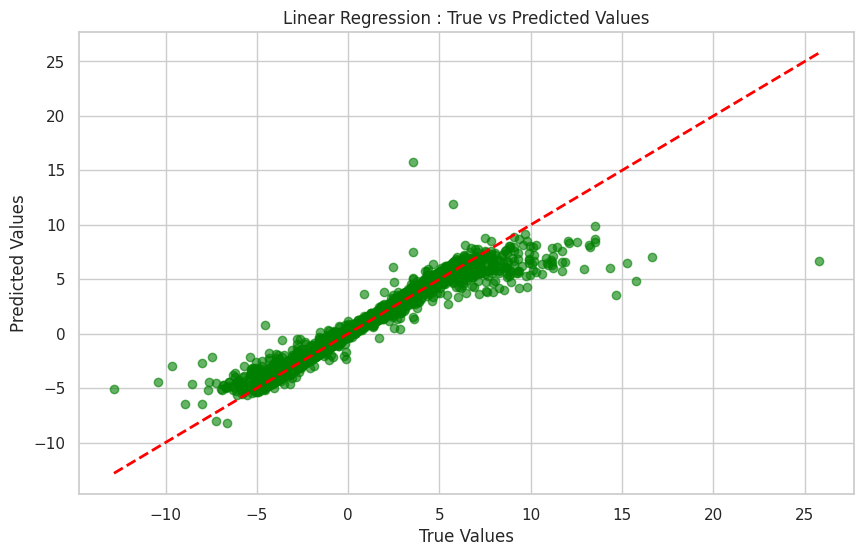

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, alpha=0.6, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title("Linear Regression : True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


In [ ]:
# ------- 2. SVR Model -------
from sklearn.svm import SVR
pipeline_svr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', SVR(kernel='rbf'))
])
pipeline_svr.fit(X_train, y_train)
y_pred_svr = pipeline_svr.predict(X_test)
print_model_metrics("Support Vector Regression (SVR)", y_test, y_pred_svr)



Support Vector Regression (SVR):
R-squared: 0.9680
Mean Absolute Error: 0.1401
Mean Squared Error: 0.2322


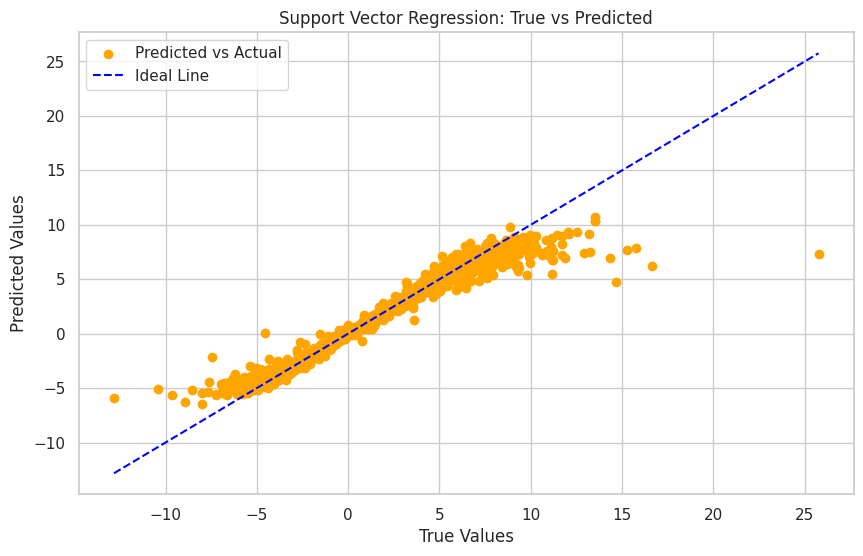

In [ ]:
# Plot predicted vs true values for the SVR model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='orange', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Support Vector Regression: True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ------- 3. Random Forest Model -------
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Preprocessing step
    ('model', RandomForestRegressor(random_state=42))  # Model step
])

pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)
print_model_metrics("Random Forest Regressor", y_test, y_pred_rf)


Random Forest Regressor:
R-squared: 0.9744
Mean Absolute Error: 0.1889
Mean Squared Error: 0.1855


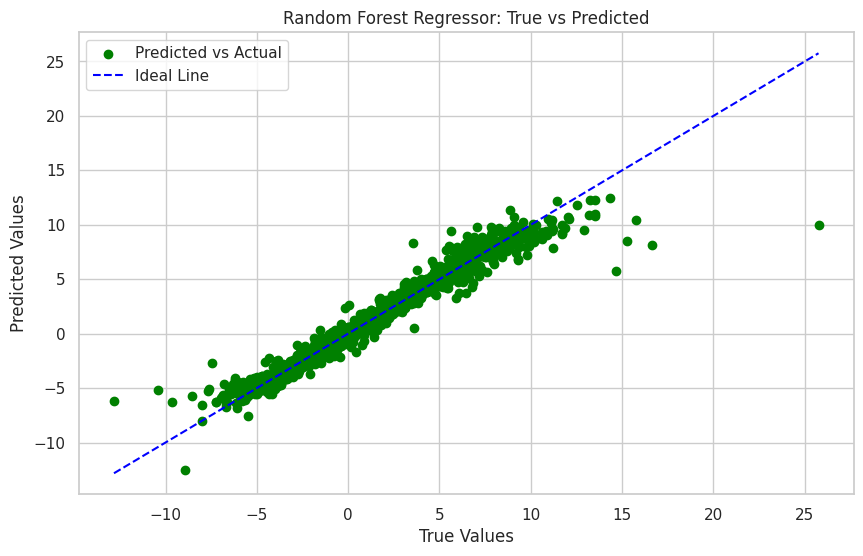

In [ ]:
# Plot the true vs predicted values for Random Forest

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Regressor: True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# ------- 4. XGBoost Regressor Model -------
from xgboost import XGBRegressor

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42, n_estimators=100, learning_rate=0.1))
])

# Train the XGBoost Regressor
pipeline_xgb.fit(X_train, y_train)

# Predict using the XGBoost Regressor
y_pred_xgb = pipeline_xgb.predict(X_test)

# Print metrics for the XGBoost Regressor
print_model_metrics("XGBoost Regressor", y_test, y_pred_xgb)



XGBoost Regressor:
R-squared: 0.9757
Mean Absolute Error: 0.1739
Mean Squared Error: 0.1759


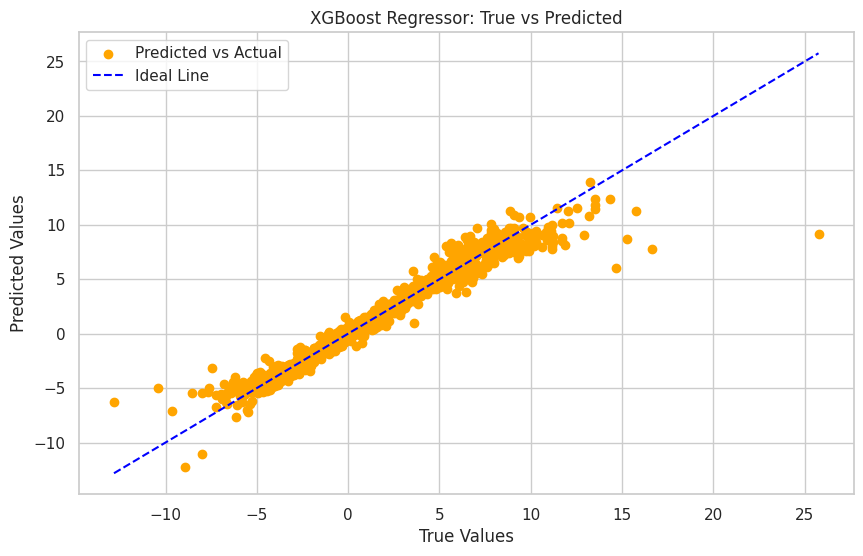

In [ ]:
# Plot the true vs predicted values for XGBoost

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_xgb, color='orange', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Ideal Line')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('XGBoost Regressor: True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()
